In [70]:
!pip install pillow

In [71]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [72]:
train_data_dir = 'data/neural_network_data/train'
test_data_dir = 'data/neural_network_data/validation'

test_generator = ImageDataGenerator().flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    batch_size=132)

train_generator = ImageDataGenerator().flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    batch_size=790)

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 132 images belonging to 2 classes.
Found 790 images belonging to 2 classes.


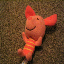

In [73]:
array_to_img(train_images[130])

In [74]:
# check the shape of the data
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(790, 64, 64, 3)
(790, 2)
(132, 64, 64, 3)
(132, 2)


In [75]:
train_img_unrow = train_images.reshape(790, -1).T

In [76]:
np.shape(train_img_unrow)

(12288, 790)

In [77]:
test_img_unrow = test_images.reshape(132, -1).T

In [78]:
np.shape(test_img_unrow)

(12288, 132)

In [79]:
train_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [80]:
train_generator.class_indices

{'not_santa': 0, 'santa': 1}

In [81]:
np.shape(train_labels)

(790, 2)

In [82]:
train_labels_final = train_labels.T[[1]]
np.shape(train_labels_final)

(1, 790)

In [83]:
test_labels_final = test_labels.T[[1]]

In [84]:
np.shape(test_labels_final)

(1, 132)

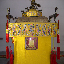

In [85]:
array_to_img(train_images[240])

In [86]:
train_labels_final[:,240]

array([0.], dtype=float32)

In [87]:
# standardize the data
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

In [88]:
type(test_img_unrow)

numpy.ndarray

In [89]:
# building logistic regression neural network

In [90]:
# initialise w b
b = 0

def init_w(n):
    w = np.zeros((n,1))
    return w

In [91]:
# forward propagation
def propagation(w, b, x, y):
    
    l = np.shape(x)[1]
    y_hat = 1/(1 + np.exp(-(np.dot(w.T, x) + b)))
    cost = -1/l * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    dw = 1/l * np.dot(x, (y_hat-y).T)
    db = 1/l * np.sum(y_hat - y)
    
    return dw, db, cost

In [92]:
w = init_w(64*64*3)
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [93]:
print(dw)
print(db)
print(cost)

[[-0.05784065]
 [-0.05436336]
 [-0.06367089]
 ...
 [-0.07482998]
 [-0.06692231]
 [-0.07262596]]
-0.01139240506329114
0.6931471805599452


In [94]:
def optimization(w,b,x,y, num_iterations, learning_rate, print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        
        dw, db, cost = propagation(w,b,x,y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
            
    return w, b,  costs

In [95]:
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 2000, 0.005, True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.880402
Cost after iteration 100: 0.763331
Cost after iteration 150: 0.628797
Cost after iteration 200: 0.518186
Cost after iteration 250: 0.442320
Cost after iteration 300: 0.391254
Cost after iteration 350: 0.354488
Cost after iteration 400: 0.326262
Cost after iteration 450: 0.304070
Cost after iteration 500: 0.287473
Cost after iteration 550: 0.276690
Cost after iteration 600: 0.269139
Cost after iteration 650: 0.262364
Cost after iteration 700: 0.255995
Cost after iteration 750: 0.249976
Cost after iteration 800: 0.244271
Cost after iteration 850: 0.238848
Cost after iteration 900: 0.233684
Cost after iteration 950: 0.228756
Cost after iteration 1000: 0.224046
Cost after iteration 1050: 0.219537
Cost after iteration 1100: 0.215215
Cost after iteration 1150: 0.211066
Cost after iteration 1200: 0.207080
Cost after iteration 1250: 0.203246
Cost after iteration 1300: 0.199553
Cost after iteration 1350: 0.195995
Cost after iter

In [96]:
def prediction(w,b,x):
    
    l = x.shape[1]
    y_prediction = np.zeros((1,l))
    w = w.reshape(x.shape[0],1)
    y_hat = 1/(1 + np.exp(-(np.dot(w.T, x) + b)))
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5):
            y_prediction[0,i]   = 1
        else:
            y_prediction[0,i] = 0
    return y_prediction

In [97]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2],
             [1,-2,0.1,-1],
             [0.2,0.4,-1.2,-2]])

prediction(w,b,x)

array([[1., 1., 0., 0.]])

In [98]:
x.shape

(3, 4)

In [99]:
w.shape

(3, 1)